<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 3: The Unix File System, Shell, and Introduction to git</h1>
</div>


## Structure of the File System

* Folder and file system structure for a standard Unix/Linux (*nix) system is as follows.
* MacOS also follows this structure for the most part.
* You can try typing `ls /` from a *nix or MacOS command shell to list the content of the root directory.

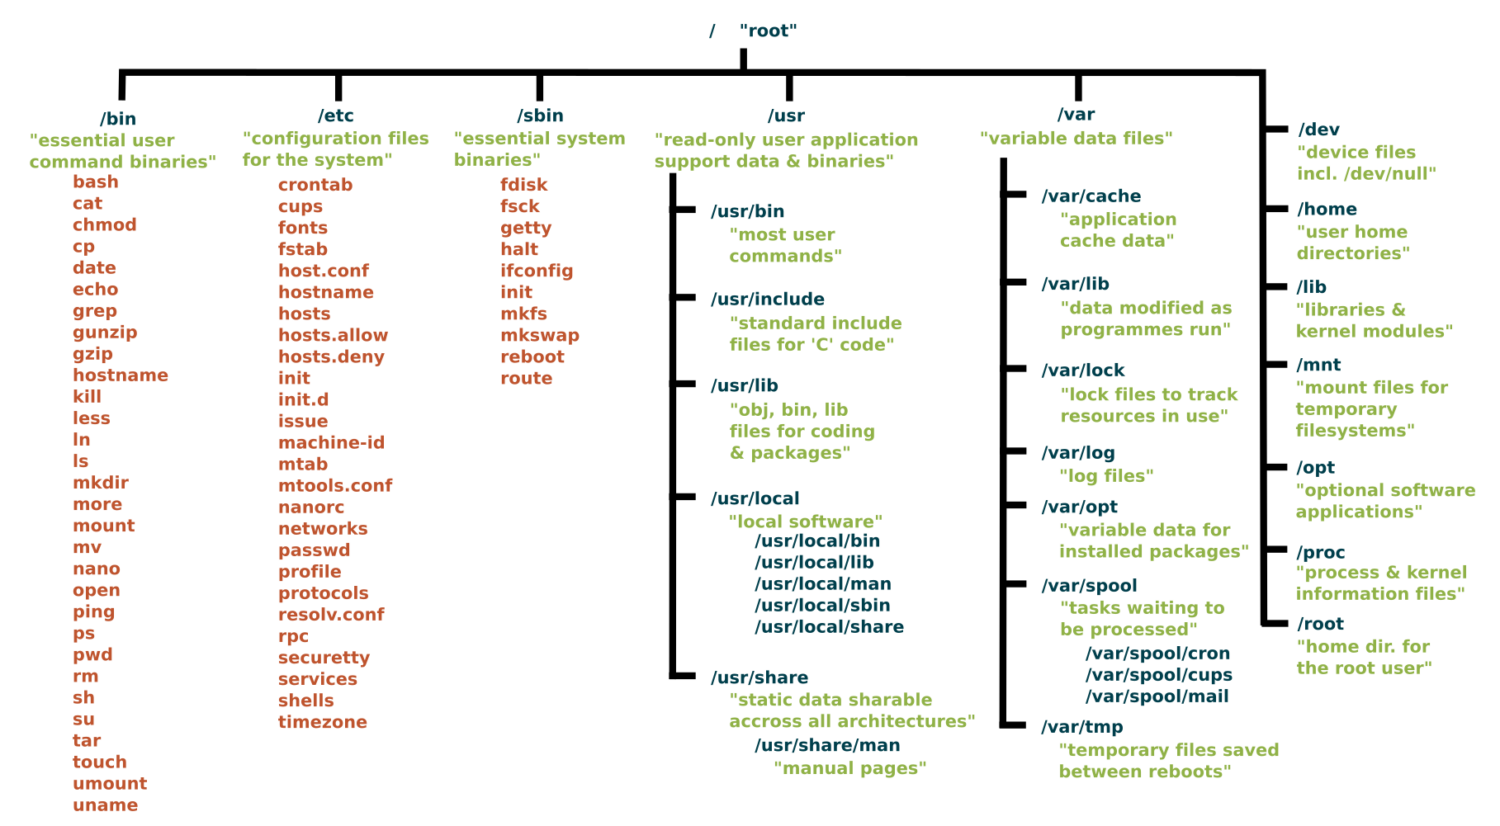

From https://commons.wikimedia.org/wiki/File:Standard-unix-filesystem-hierarchy.svg

> Try `ls /` from a terminal on your cloud account.

### Key directories

* `/`: The slash character by itself is the _root_ of the filesystem
* `/bin`: A place containing programs that you can run
* `/boot`: A place containing the kernel and other pieces that allow your computer to start
* `/dev`: A place containing special files representing all your devices
* `/etc`: A place with lots of configuration information (i.e. login and password data)
* `/home`: All user's home directories
* `/lib`: A place for all system libraries
* `/mnt`: A place to mount external file systems
* `/opt`: A place to install user software
* `/proc`: Lots of information about your computer and what is running on it
* `/sbin`: Similar to bin but for the superuser
* `/usr`: Honestly a mishmash of things and rather overlapping with other directories
* `/tmp`: A place for temporary files that will be wiped out on a reboot
* `/var`: A place where many programs write files to maintain state

There are also some special directory symbols:

* `.`: The current directory you are in
* `..`: The parent directory of the one you are in. Interestingly, the `..` of `/` is `/`
* `~`: Your home directory

You can read more about the Unix filesystem at https://en.wikipedia.org/wiki/Unix_filesystem.

### How programs are found

You can see from above that there are multiple folders, usually `*/bin` that contain executable programs.

How does the command shell know where to look when you type a program name?

It's stored in an environment variable called `PATH`. 

You can see the value of `PATH` by typing `echo $PATH` at a command shell. Here's the output on our NERC instance.

```sh
$ echo $PATH
/usr/share/Modules/bin:/opt/app-root/bin:/opt/app-root/src/.local/bin/:/opt/app-root/src/bin:/opt/app-root/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/mssql-tools18/bin
```

The OS will look in each of these folders starting with the first one until it finds the command.

You can see which directory a command is found using the `which` command:

```sh
$ which ls
/usr/bin/ls
```

### Note

On MGHPCC (which we'll sometimes call NERC or MOC), your user directory might something like `/opt/app-root/src` instead of `/home/<username>`.

# The linux shell

It is an environment for finding files, executing programs, manipulating (create, edit, delete) files and easily stitching multiple commands together to do something more complex.

> Windows and MacOS has command shells, but Windows is not fully compatible, however MacOS command shell is.

> Windows Subystem for Linux is fully compatible.

## File permissions and status

Let's look at an extended directory listing from NERC command shell:

```sh
$ ls -l
total 1192
-rw-rw-r--. 1 1001170000 1001170000 1210835 Jan 22 17:55 lecture_02.ipynb
drwxrwsr-x. 3 1001170000 1001170000    4096 Jan  8 20:39 sorting
drwxrwsr-x. 2 1001170000 1001170000    4096 Jan 22 17:55 unsafe_c

# Let show sizes in 'human readable' format
$ ls -hl
total 1.2M
-rw-rw-r--. 1 1001170000 1001170000 1.2M Jan 22 17:55 lecture_02.ipynb
drwxrwsr-x. 3 1001170000 1001170000 4.0K Jan  8 20:39 sorting
drwxrwsr-x. 2 1001170000 1001170000 4.0K Jan 22 17:55 unsafe_c
```

Here's a description of every column of the output.

| File Permissions | Number of Links | Owner | Group | Size | Date Modified | Filename |
| ---------------- | --------------- | ----- | ----- | ---- | ------------- | -------- |
| -rw-rw-r--. | 1 | 1001170000 | 1001170000 | 1.2M | Jan 22 17:55 | lecture_02.ipynb
| drwxrwsr-x. | 3 | 1001170000 | 1001170000 | 4.0K | Jan  8 20:39 | sorting
| drwxrwsr-x. | 2 | 1001170000 | 1001170000 | 4.0K | Jan 22 17:55 | unsafe_c

The Owner and Group names are not so descriptive, but we can verify these are correct with `whoami` and `groups`.

```sh
$ whoami
1001170000

$ groups
root groups: cannot find name for group ID 1001170000
1001170000
```

The listing from MacOS has actual Owner and Group names.

| File Permissions | Number of Links | Owner | Group | Size | Date Modified | Filename |
| ---------------- | --------------- | ----- | ----- | ---- | ------------- | -------- |
| drwxr-xr-x  | 14 | tomg | staff | 448 | Aug 15 15:43 | courses |
| drwxr-xr-x@ | 16 | tomg | staff | 512 | Aug 26 2023 | coursework |

What's the deal with the first 10 characters?

We'll describe it by location position 0, 1, 2, ..., 9.

### Location 0 describes the file type 

```sh
- = Normal file
d = Normal directory
l = Symbolic link to another file or directory
s = Socket allowing data to pass between 2 processes
p = Named pipe (similar to socket but unidirectional)
c = Character device (i.e. mouse, keyboard, terminal)
b = Block device (i.e. disk, cd-roms, ramdisks)
```

> Note: You can see character devices at `ls -l /dev`.

### Locations 1-9

Locations 1-3, 4-6, 7-9 are each triplets that describe the permissions for **user**, **group** and **world**.

In each triplet is the `rwx` status, where the letter shows allowed and a dash `-` shows disabled.

So `r--` means that the item can be read but not written to or executed.

```
             group permissions
        file type    |    extended attributes
                |   ---   |
                drwxr-xr-x@
                 ---   ---
                  |     |
                  |       other/world permissions
                  user permissions
```

```
R = read
W = write
X = execute
T = sticky -- only file owners can delete/rename files within directory
S = set-user-id or set-group-id -- run with privileges of the file owner rather than the user running the program
```

## Important commands

Not all commands are supported by every distribution or installation, but usually one of the synonymous commands exist.

### "Every day" commands

```
ls      Lists a directory’s content
pwd     Shows the current working directory’s path
cd      Changes the working directory
mkdir   Creates a new directory
rm      Deletes a file
cp      Copies files and directories, including their content
mv      Moves or renames files and directories
touch   Creates a new empty file
file    Checks a file’s type
cat     Lists, combines, and writes a file’s content as a standard output
head    Displays a file’s first ten lines
tail    Prints a file’s last ten lines
history	Lists previously run commands
man     Shows a command’s manual
echo	Prints a message as a standard output
```

### Sort, replace, manipulate file contents

These commands maybe very handy on homework #1. 😜

```
grep  Searches a string within a file
sed   "Stream Editor" -- Finds, replaces, or deletes patterns in a file
awk   Finds and manipulates patterns in a file
sort  Reorders a file’s content
```

#### `grep`

Try some examples:

> Note that you can "escape" commands to the terminal shell with a leading exclamation point '!'. The
> following cells need to be run on a unix, linux or MacOS system.

In [1]:
# find all occurences of the string 'meta'
!grep 'meta' lecture_03.ipynb

   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
    "# find all occurences of the string 'meta'\n",
    "!grep 'meta' lecture_03.ipynb"
   "metadata": {},
    "# count all occurences of the string 'meta'\n",
    "!grep -c 'meta' lecture_03.ipynb"
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   "metadata": {},
   

In [2]:
# count all occurences of the string 'meta'
!grep -c 'meta' lecture_03.ipynb

56


#### `awk`

`awk`, named after creators Aho, Weinberger and Kernighan, is a pattern-directed scanning and processing language.

See [The AWK Programming Language](https://dn790008.ca.archive.org/0/items/pdfy-MgN0H1joIoDVoIC7/The_AWK_Programming_Language.pdf).

We'll use the example file `example_text.txt`.

In [3]:
!cat example_text.txt

name age score
Alice 25 90
Bob 30 85
Charlie 22 95
David 28 84


#### Example 1 -- print specific columns

In [4]:
!awk '{print $1, $3}' example_text.txt

name score
Alice 90
Bob 85
Charlie 95
David 84


#### Example 2 -- sum values in a column

In [5]:
!awk '{sum += $3} END {print "Total Score:", sum}' example_text.txt

Total Score: 354


#### Example 3 -- Filter rows based on condition

In [6]:
!awk '$3 > 90' example_text.txt

name age score
Charlie 22 95


### Compressing and Archiving

```
zip and unzip	Creates and extracts a ZIP archive
tar	            Archives files without compression in a TAR format
```

### Command Shell Text Editors

Very handy to get know at least one of these for quick edits.

```
nano, vi, and jed	Edits a file with a text editor
```

### User-level administrative tasks

Things you might want to do as a regular user.

```
chmod	Modifies a file’s read, write, and execute permissions
chown	Changes a file, directory, or symbolic link’s ownership

df       Displays the system’s overall disk space usage
du	     Checks a file or directory’s storage consumption
top	     Displays running processes and the system’s resource usage
htop	 Works like top but with an interactive user interface
ps	     Creates a snapshot of all running processes
uname	 Prints information about your machine’s kernel, name, and hardware
hostname Shows your system’s hostname
time     Calculates commands’ execution time

jobs	Displays a shell’s running processes with their statuses
kill	Terminates a running process

cut	Sections and prints lines from a file
diff	Compares two files’ content and their differences
tee	Prints command outputs in Terminal and a file
locate	Finds files in a system’s database
find	Outputs a file or folder’s location
```

### Network access commands

```
wget  Downloads files from a URL
curl  Transmits data between servers using URLs
ssh   Securely connect to another system
scp   Securely copies files or directories to another system
```

### System administration

Useful commands for system administration.

```
sudo	            Runs a command as a superuser
su                  Runs programs in the current shell as another user
useradd and userdel Creates and removes a user account

systemctl  Manages system services
watch	   Runs another command continuously

shutdown  Turns off or restarts the system
ping      Checks the system’s network connectivity

nc          Connect to a remote host using a specific port
nmap        Find open ports to connect to on a server
openssl     Make a secure connection to a port on a server
rsync       Synchronizes content between directories or machines
ifconfig    Displays the system’s network interfaces and their configurations
netstat     Shows the system’s network information, like routing and sockets
traceroute  Tracks a packet’s hops to its destination
nslookup    Queries a domain’s IP address and vice versa
dig         Displays DNS information, including record types

ln                  Links files or directories
alias and unalias   Sets and removes an alias for a file or command
cal                 Displays a calendar in Terminal
apt-get             Manages Debian-based distros package libraries
```
https://www.hostinger.com/tutorials/linux-commands

### Redirects and Pipes

`>` and `<` tell the shell that the command's output and input should come from a file instead of the terminal.

`|` set between two command instructs the shell to pass the output of the first command to the second.

In [7]:
!ls | grep png

areas.png
deltas.png
github.png
snapshots.png


### Getting Help Information on Commands

It varies by system, but two ways to get more information on a command are with `man` command and `--help` argument. If one doesn't work, try the other. Of course you can Google it too.

On our cloud instance:

```sh
$ man ls
No manual entry for ls

$ ls --help
Usage: ls [OPTION]... [FILE]...
List information about the FILEs (the current directory by default).
Sort entries alphabetically if none of -cftuvSUX nor --sort is specified.

Mandatory arguments to long options are mandatory for short options too.
  -a, --all                  do not ignore entries starting with .
  -A, --almost-all           do not list implied . and ..
      --author               with -l, print the author of each file
...
```



## Shell scripts

A way to write simple programs using the linux commands and some control flow elements.  Good for small things.  Never write anything complicated using shell.

### Shell Script File

Shell script files typically use the extension `*.sh`, e.g. `script.sh`.

Shell script files start with a **shebang** line, `#!/bin/bash`.

```sh
#!/bin/bash

echo "Hello world!"
```

### Variables

Start with letter and include numbers and `_` if needed.
```
ABC="13"
```
> No spaces between `=` and variable name and value allowed.

To access the content of a variable use \\\$

```sh
echo $ABC
```

### Arrays
To create an array:

```sh
value3=55
arr=("value1" value2 $value3)  
```

To print an array:

```sh
echo ${arr[@]}  
```

To print length of an array:  

```sh
echo ${#arr[@]}  
```

Using indices (index starts from 0):

```sh
echo ${arr[1]}  
```

### If statements

```sh
a=5
b=6
if [ "$a" = "$b" ]  
then  
    echo "a is equal to b"
else
    echo "a is not equal to b"
fi 
```

### While statements

```sh
CORRECT=n
while [ "$CORRECT" = "n" ]
do

# loop discontinues when you enter y i.e., when your name is correct

echo -n "Enter your name: "
read NAME

echo -n "Is ${NAME} correct (y/n)? "
read CORRECT

done
```

Try with `source while_example1.sh`. _Note: works correctly on linux but incorrectly on MacOS._

OR

```sh
a=0

# lt is less than operator
#Iterate the loop until a less than 10
while [ $a -lt 10 ]
do

# Print the values
echo $a

# increment the value
a=`expr $a + 1`

done
```

Try with `source while_example2.sh`.

### For statement

```sh
COLORS="red green blue"

# the for loop continues until it reads all the values from the COLORS
# splitting on space, tab or newline

for COLOR in $COLORS
do
  echo "COLOR: $COLOR"
done
```

Run `source for_example1.sh`

> Note that the above script runs correctly on Linux bash but not on MacOS zsh.

OR 

```sh
max=5
for ((i = 0 ; i < max ; i++ )) 
do 
  echo "$i"
done
```

Run `source for_example2.sh`

<div align="center">
    <h1>Source Control and Git</h1>
</div>


## Source Control

### Allow tracking, maintenance and collaboration on software projects.

Extremely important for modern software development!!

Some key capabilities:

* **Revision tracking**:  Track changes to files and the project.  Track who made the change and when they made them.
* **Rollback and forward**: Move between revisions as needed.  Restore known good versions while working on fixes for current version.
* **Fork and clone**: Allow a project to diverge with a completely separate revision history (fork) or extended with connected revision history
* **Compare and merge**: Compare a project and its clone and reconcile the differences to a single final version.
* **Pull request**: Issue a request to pull a clone/fork into the original revision history
* **Commit**: The act of adding changes to the project and creating a new revision.
* **Conflict resolution**: When merging multiple branches detect conflicts and provide a resolution mechanism.


## What tools are there for source control

A lot of them!!!

* **Git** -- by far the most prevalent and will be our focus
* RCS (old)
* CVS (old)
* SVN
* Perforce 
* Mercurial
* Subversion
* Stash
* Others....

Most of them allow for remote/local repository combinations.  

Git can be partnered with Github and GitLab (more on those later).

### Deltas versus Snapshots

_The following images are from https://git-scm.com/book._

Historically, source control systems were implemented to store deltas between versions.

<div style="text-align: center;">
  <img src="deltas.png" alt="Deltas Image" style="width: 70%;">
</div>

Git is fundamentally different in that it stores snapshots of the entire project at each revision.

<div style="text-align: center;">
  <img src="snapshots.png" alt="Deltas Image" style="width: 70%;">
</div>

Everything is file is checksummed using a 40 character SHA-1 hash and is referenced by that hash, e.g.
```
24b9da6552252987aa493b52f8696cd6d3b00373
```

For example, if I have a file called `example_text.txt` and I want to get the SHA-1 hash of the file, I can use the `git hash-object` command.


In [8]:
!git hash-object example_text.txt

87497b73bbcf9dde12c25c79c7cd10ddbe3f9756


All snapshots, references to files, etc. are stored in the `.git` directory which, 
like all files that begin with a dot, is hidden when you list the contents of the 
current directory with a simple `ls`. 

To show the normally hidden files, you can  use the `ls -a` command.

You don't modify contents of the `.git` directory directly. Instead you use
the numerous `git` commands.

### The Three Main File States in Git



Git has three main states that your files can reside in: **modified**, **staged**, and **committed**:

* **Modified** means that you have changed the file but have not committed it to your database yet.
* **Staged** means that you have marked a modified file in its current version to go into your next commit snapshot.
* **Committed** means that the data is safely stored in your local database.

This leads us to the three main sections of a Git project: 
1. the **working tree**, 
2. the **staging area**, and 
3. the **Git directory**.

<div style="text-align: center;">
  <img src="areas.png" alt="File States Image" style="width: 70%;">
</div>




The real power of Git is its lightweight branching and merging capabilities.

Typicall you have a main branch (usually called `main`) and you create
a new branch for each new feature or bug fix.  

You can then merge the branch back
into the main branch after the feature is complete.

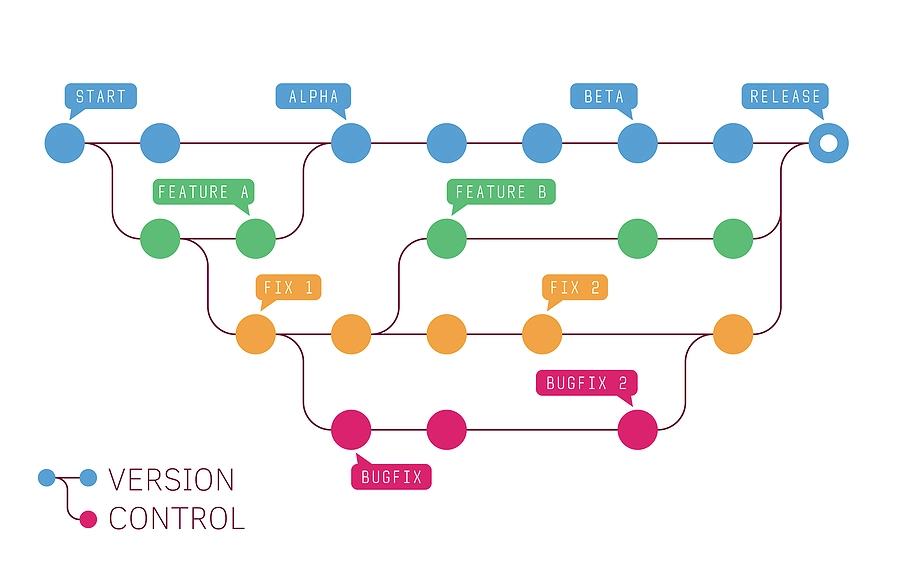

Strongly recommend reading [Git Branching](https://git-scm.com/book/en/v2/Git-Branching-Branches-in-a-Nutshell) and
in general the first 4 or 5 chapters of the [Pro Git book](https://git-scm.com/book/en/v2).

### Git Server

You can set up a _remote_ repository on a server or elsewhere and synchronize your local repository with it.

This is useful for collaboration and for backup.

<div style="text-align: center;">
  <img src="github-workflow-server.jpg" alt="Git Server Image" style="width: 60%;">
</div>


## Git Commands



Free tool available at https://git-scm.com/downloads.

Also integrated with VSCode (by default any VSCode project will be initialized as Git repository)

Some of the most useful commands:  

### Creating and maintaining your local repository

```sh 
git --version #show the version
git init #initialize a local repository
git status #show the status of repository/branch
git add file or git add -A #add files to branch  
git rm file # Delete files from branch
git diff file # Show the differences between the current and pervious version
git commit -m "My first commit in the local repository" #Submit files to repository`   
git branch mynewbranch #Make a new branch`  
git checkout mynewbranch #switch to using the new branch`  
```

### Merging and deleting branches

```sh
# Now you can add and commit files in the new branch mynewbranch
# You can move between branches using the checkout command
git checkout main
git merge mynewbranch   # Merge mynewbranch into main
git branch -d mynewbranch #Delete mynewbranch

# Conflicts can arise when merging branches.  You may need to resolve them using an editor
git log # See what commits exist in your repository`  
git checkout old_commit_number # Go back to an older version`  
```

### Managing remote repository and synchronizing local and remote

```sh
git remote add origin https://github.com/kthanasi-git/My-new-repo #Add a non-local origin for safety`  
git push --set-upstream origin main #push our current local repository to origin and set upstream tracking branch  

git fetch origin #Fetch from origin to local repository
git merge origin/main #Merge origin to main
git pull origin #Fetch and merge in a single operation
git push origin #Push to origin after having made local changes
git clone url # Create a local copy of a git internet repository
```

* You can read a lot more at https://git-scm.com/ or https://www.w3schools.com/git/  


## GitHub

Most convenient way to maintain a remote repository is through GitHub.

* extra safe backup and 
* a convenient location for collaboration

<div style="text-align: center;">
  <img src="github.png" alt="GitHub Image" style="width: 70%;">
</div>

> Important: Please create an account if you don't already have one.

## Git Detailed demo

### Install Git-it from https://github.com/jlord/git-it-electron/releases 

and let's follow through

## In Class Poll

> Will be opened and made visible in class.

https://piazza.com/class/m5qyw6267j12cj/post/35

